In [61]:
import pandas as pd
data=pd.read_csv("/Users/alfahwun/Downloads/CC GENERAL.csv")

In [62]:
data=data.drop("CUST_ID", axis=1)
data

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8947,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


In [63]:
data.isnull().sum()

BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [64]:
#filling null value of MINIMUM_PAYMENTS with the mean value of the column
data['MINIMUM_PAYMENTS'] = data['MINIMUM_PAYMENTS'].fillna(data['MINIMUM_PAYMENTS'].mean())
#filling the unique null value on the CREDIT_LIMIT column with the mode
data['CREDIT_LIMIT'] = data['CREDIT_LIMIT'].fillna(data['CREDIT_LIMIT'].mode()[0])

In [65]:
#standarizing the dataset
from sklearn.preprocessing import StandardScaler
data_scaled= StandardScaler().fit_transform(data)

In [66]:
#Feature reduction using PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
data_pca= pca.fit_transform(data_scaled)
data_= pd.DataFrame(data=data_pca,columns=['PC1', 'PC2'])

In [67]:
data_

,PC1,PC2
0,-1.682243,-1.076390
1,-1.138204,2.506530
2,0.969705,-0.383511
3,-0.873595,0.043195
4,-1.599443,-0.688515
...,...,...
8945,-0.359718,-2.016183
8946,-0.564449,-1.639157
8947,-0.926290,-1.810819
8948,-2.336613,-0.657975


In [68]:
#Importing our clustering algorithm : Agglomerative
from sklearn.cluster import AgglomerativeClustering

In [69]:
#Applying agglomerative algorithm with 3 clusters, using euclidean distance as a metric
model=AgglomerativeClustering(n_clusters=3, metric='euclidean', linkage='complete')
clust_labels=model.fit_predict(data_)

In [70]:
#After we finished creating our clusters, we can print each point’s corresponding cluster
agglomerative=pd.DataFrame(clust_labels)
agglomerative

,0
0,0
1,0
2,0
3,0
4,0
...,...
8945,0
8946,0
8947,0
8948,0


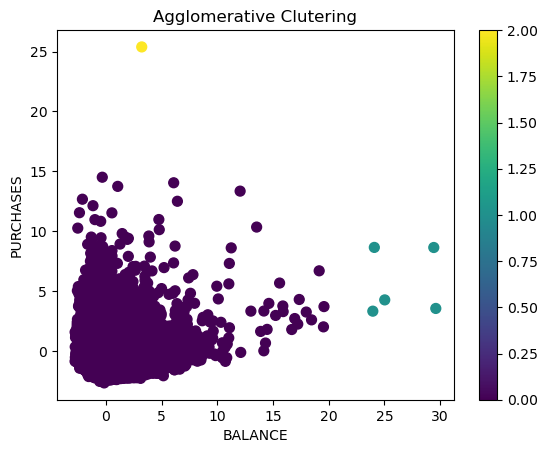

In [71]:
#Agglomerative cluster plot

import matplotlib.pyplot as plt
fig =plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter (data_ ['PC1'] , data_ ["PC2"] , c= agglomerative[0], s=50)
ax.set_title("Agglomerative Clutering")
ax.set_xlabel("BALANCE")
ax.set_ylabel("PURCHASES")
plt.colorbar(scatter)

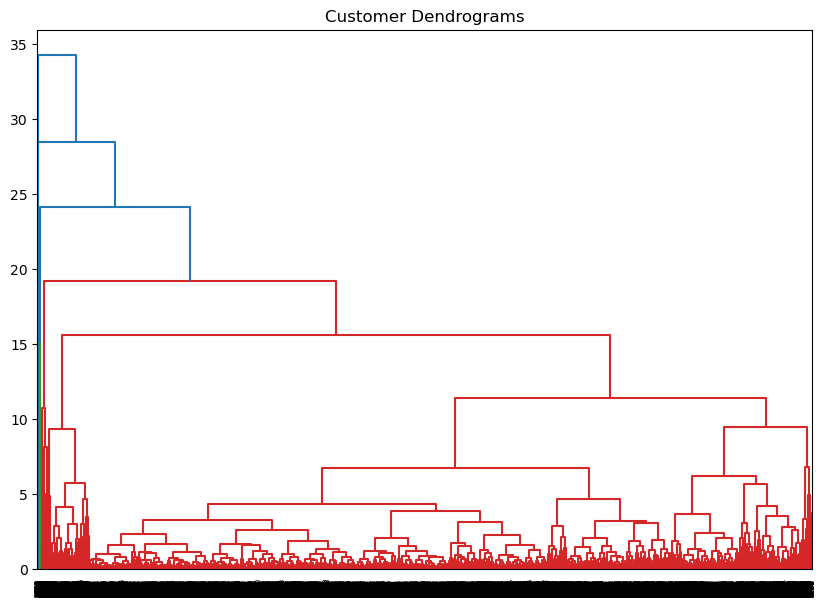

In [72]:
#Dendrogram visualization
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10,7))
plt.title("Customer Dendrograms")
dend=shc.dendrogram(shc.linkage(data_, method="complete"))


##K-Means methode

In [73]:
from sklearn.cluster import KMeans  #Importing our clustering algorithm: KMeans

In [74]:
#K-best Value
#Calculating the squared distance of each point from its closest cluster .
SumSqrDistance=[]
K = range (1,15)
for k in K:
    km = KMeans(n_init=10,n_clusters=k)
    km = km.fit(data_)
    SumSqrDistance.append(km.inertia_)

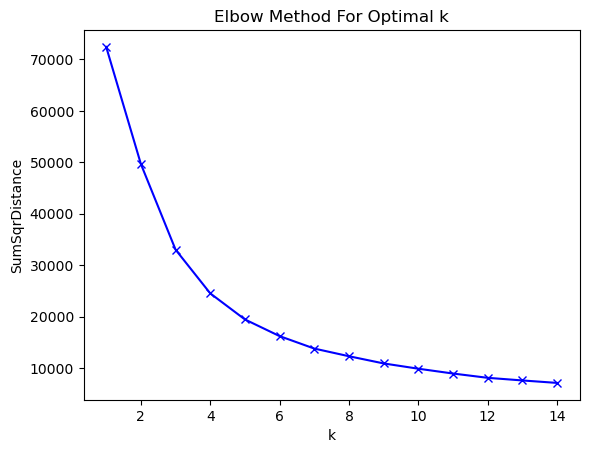

In [75]:
#The Elbow method code:
#The plot is like an arm, the elbow is the optimal K.

plt.plot (K, SumSqrDistance, 'bx-')
plt.xlabel('k')
plt.ylabel('SumSqrDistance')
plt.title('Elbow Method For Optimal k')
plt.show ()

In [76]:
kmeans=KMeans(n_init=10,n_clusters=3, random_state=0)  #Cluster our data by choosing 5 as number of clusters
kmeans.fit(data_)

KMeans(n_clusters=3, n_init=10, random_state=0)

In [77]:
#This instruction enables us to print the label of each point in our data after the clustering is done.
labels=pd.DataFrame(kmeans.labels_)
labels

,0
0,0
1,1
2,0
3,0
4,0
...,...
8945,0
8946,0
8947,0
8948,0


In [78]:
kmeans.predict(data_)
print(kmeans.cluster_centers_)   #Printing the coordinates of cluster centers.

[[-0.55873554 -0.76084906]
 [-0.81277718  2.91417574]
 [ 3.97880169 -0.11159584]]


In [79]:
data_['label']=labels

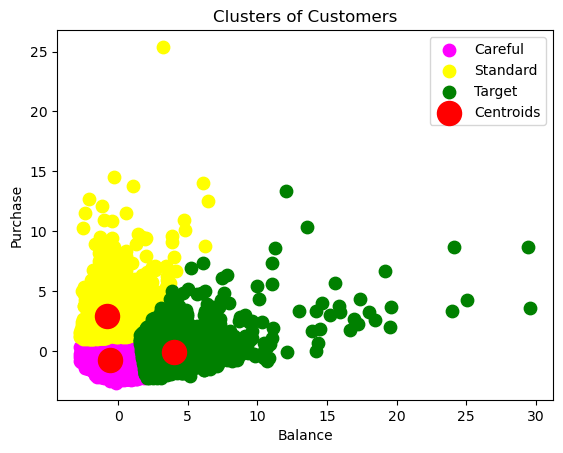

In [80]:
#K-means plot Each colored group represents a cluster.


plt.scatter(data_["PC1"][data_.label == 0],          
            data_["PC2"][data_.label == 0],s=80,c='magenta',label='Careful')
plt.scatter(data_["PC1"][data_.label == 1],
           data_["PC2"][data_.label == 1],s=80,c='yellow',label='Standard')
plt.scatter(data_["PC1"][data_.label == 2],
           data_["PC2"][data_.label == 2],s=80,c='green',label='Target')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', label = 'Centroids')
plt.title('Clusters of Customers')
plt.xlabel('Balance')
plt.ylabel('Purchase')
plt.legend()
plt.show()